In [58]:
import numpy as np
import matplotlib.pyplot as plt
import configparser

In [3]:
dirname = '/data54/lavaux/VELMASS/halo_central/halos_new/'
lam = 5
R_max = 100
Mmin = 3e12
    
with open(dirname + "/halos_0.0.ascii", "rb") as f:
    for _ in range(30):
        r = str(f.readline())
        if "Units" in r:
            print(r)

# Get box size
with open(dirname + '/auto-rockstar.cfg') as f:
    data = [r for r in f]
Lbox = [r for r in data if r.startswith('BOX_SIZE')][0].strip()
Lbox = float(Lbox.split('=')[1])
origin = np.array([Lbox/2, Lbox/2, Lbox/2])    
omega_m = [r for r in data if r.startswith('Om')][0].strip()
omega_m = float(omega_m.split('=')[1])

halo_file = dirname + '/out.npy'
halos = np.load(halo_file)

# Cut by mass
# Mmin = ???
halos = halos[halos['Mvir'] > Mmin]

xtrue = halos['X']  - origin[0] # Mpc / h
ytrue = halos['Y']  - origin[1] # Mpc / h
ztrue = halos['Z']  - origin[2] # Mpc / h
rtrue = np.sqrt(xtrue**2 + ytrue**2 + ztrue**2) # Mpc / h

b'#Units: Masses in Msun / h\n'
b'#Units: Positions in Mpc / h (comoving)\n'
b'#Units: Velocities in km / s (physical, peculiar)\n'
b'#Units: Halo Distances, Lengths, and Radii in kpc / h (comoving)\n'
b'#Units: Angular Momenta in (Msun/h) * (Mpc/h) * km/s (physical)\n'
b'#Units: Spins are dimensionless\n'
b'#Units: Total energy in (Msun/h)*(km/s)^2 (physical)\n'


12449803
2000.0
	Made 342 of 400
	Made 400 of 400


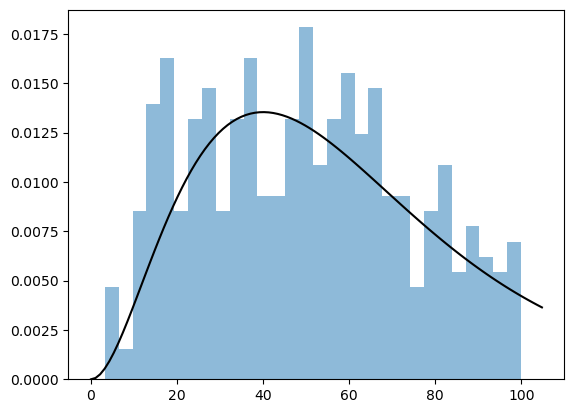

In [56]:
# Sample 
Nt = 400
R_lim = 100
print(len(rtrue))
print(Lbox)

# Get relative probability of each object according to selection function
# lam = float(config[f'sample_{i}']['lam'])
# R_max = float(config['mock']['R_max'])
prob = np.exp(- lam * rtrue / R_max)
prob /= np.sum(prob)

accepted_count = 0
rsamp = np.zeros(Nt)

# Loop until we have Nt valid positions
while accepted_count < Nt:

    ids = np.random.choice(len(rtrue), size=Nt, p=prob, replace=False)
    
    # Here I would actually scatter
    
    valid_indices = rtrue[ids] < R_lim
    ids = ids[valid_indices]
    
    # Calculate how many valid positions we need to reach Nt
    remaining_needed = Nt - accepted_count
    selected_count = min(len(ids), remaining_needed)
    ids = ids[:selected_count]

    # Append only the needed number of valid positions
    rsamp[accepted_count:accepted_count+selected_count] = rtrue[ids]

    # Update the accepted count
    accepted_count += selected_count

    print(f'\tMade {accepted_count} of {Nt}')
    
    # Set up for next iteration
    prob[ids] = 0
    prob /= np.sum(prob)

plt.hist(rsamp, bins=30, density=True, alpha=0.5)
x = plt.gca().get_xlim()
x = [max(0, x[0]), x[1]]
x = np.linspace(x[0], x[1], 100)
y = x ** 2 * np.exp( - lam * x / R_max) * (lam / R_max) ** 3 / 2
plt.plot(x, y, color='k')

In [57]:
comb_x = np.array([xtrue, ytrue, ztrue])
print(comb_x.shape)

(3, 12449803)


In [62]:
dirname = '/data54/lavaux/VELMASS/halo_central/halos_new/'

def parse_file_to_dict(file_path):
    config_dict = {}
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if not line or line.startswith("#"):  # Skip empty lines and comments
                continue
            key, value = line.split("=", 1)
            key = key.strip()
            value = value.strip()

            # Convert the value to the appropriate type (int, float, or leave as string)
            if value.isdigit():
                value = int(value)
            else:
                try:
                    value = float(value)
                except ValueError:
                    pass  # Leave it as a string if it cannot be converted

            config_dict[key] = value

    return config_dict


config_dict = parse_file_to_dict(f'{dirname}/rockstar.cfg')
print(config_dict.keys())
print(config_dict['Om'])
print(type(config_dict['Om']))

dict_keys(['FILE_FORMAT', 'PARTICLE_MASS', 'MASS_DEFINITION', 'MASS_DEFINITION2', 'MASS_DEFINITION3', 'MASS_DEFINITION4', 'MASS_DEFINITION5', 'STRICT_SO_MASSES', 'MIN_HALO_OUTPUT_SIZE', 'FORCE_RES', 'FORCE_RES_PHYS_MAX', 'SCALE_NOW', 'h0', 'Ol', 'Om', 'W0', 'WA', 'GADGET_ID_BYTES', 'GADGET_MASS_CONVERSION', 'GADGET_LENGTH_CONVERSION', 'GADGET_SKIP_NON_HALO_PARTICLES', 'GADGET_HALO_PARTICLE_TYPE', 'RESCALE_PARTICLE_MASS', 'TIPSY_LENGTH_CONVERSION', 'TIPSY_VELOCITY_CONVERSION', 'PARALLEL_IO', 'PARALLEL_IO_SERVER_ADDRESS', 'PARALLEL_IO_SERVER_PORT', 'PARALLEL_IO_WRITER_PORT', 'PARALLEL_IO_SERVER_INTERFACE', 'PARALLEL_IO_CATALOGS', 'RUN_ON_SUCCESS', 'RUN_PARALLEL_ON_SUCCESS', 'LOAD_BALANCE_SCRIPT', 'INBASE', 'FILENAME', 'STARTING_SNAP', 'RESTART_SNAP', 'NUM_SNAPS', 'NUM_BLOCKS', 'NUM_READERS', 'PRELOAD_PARTICLES', 'SNAPSHOT_NAMES', 'LIGHTCONE_ALT_SNAPS', 'BLOCK_NAMES', 'OUTBASE', 'OVERLAP_LENGTH', 'NUM_WRITERS', 'FORK_READERS_FROM_WRITERS', 'FORK_PROCESSORS_PER_MACHINE', 'OUTPUT_FORMAT', '